In [1]:
from value import Value
from graph import draw_graph

### Manual Backpropagation on an Expression

In [2]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
f = Value(-2.0, label='f')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
L = d * f
L.label = 'L'


In [3]:
# Backpropagation
L.grad = 1

d.grad = f.data # dL/dd = d/dd(d * f) = f
f.grad = d.data # dL/df = d/df(d * f) = d

c.grad = d.grad # dL/dc = dL/dd * dd/dc = f * d/dc(e + c) = f * 1 = f
e.grad = d.grad # dL/de = dL/dd * dd/de = f * d/de(e + c) = f * 1 = f

a.grad = e.grad * b.data # dL/da = dL/de * de/da = f * d/da(a * b) = f * b
b.grad =  e.grad * a.data # dL/db = dL/de * de/db = f * d/db(a * b) = f * a

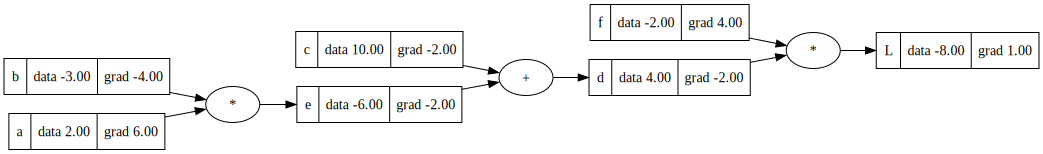

In [4]:
draw_graph(L)

In [5]:
# Single optimisation step. Increasing L by moving in the direction of the gradient.
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# Forward pass
e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


### Manual Backpropagation on a Neuron

In [6]:
# Inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, label='b')

# n = x1 * w1 + x2 * w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1 * w1'
x2w2 = x2 * w2
x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1 * w1 + x2 * w2'
n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh()
o.label = 'o'


In [7]:
# Backpropagation
o.grad = 1

n.grad = 1 - o.data**2 # do/dn = d/dn(tanh(n)) = 1 - tanh(n)**2 = 1 - o**2

x1w1x2w2.grad = n.grad # do/dx1w1x2w2 = do/dn * dn/dx1w1x2w2 = do/dn * d/dx1w1x2w2((x1 * w1 + x2 * w2) + b) = do/dn
b.grad = n.grad # do/db = do/dn * dn/db = do/dn * d/db((x1 * w1 + x2 * w2) + b) = do/dn

x1w1.grad = x1w1x2w2.grad # do/dx1w1 = do/dx1w1x2w2 * dx1w1x2w2/dx1w1 = do/dx1w1x2w2 * d/dx1w1(x1 * w1 + x2 * w2) = do/dx1w1x2w2
x2w2.grad = x1w1x2w2.grad # do/dx2w2 = do/dx1w1x2w2 * dx1w1x2w2/dx2w2 = do/dx1w1x2w2 * d/dx2w2(x1 * w1 + x2 * w2) = do/dx1w1x2w2

x1.grad = x1w1.grad * w1.data #do/x1 = do/x1w1 * dx1w1/dx1 = do/x1w1 * d/dx1(x1 * w1) = do/x1w1 * w1
w1.grad = x1w1.grad * x1.data #do/w1 = do/x1w1 * dx1w1/dw1 = do/x1w1 * d/dw1(x1 * w1) = do/x1w1 * x1
x2.grad = x2w2.grad * w2.data #do/x2 = do/x2w2 * dx2w2/dx2 = do/x2w2 * d/dx2(x2 * w2) = do/x2w2 * w2
w2.grad = x2w2.grad * x2.data #do/w2 = do/x2w2 * dx2w2/dw2 = do/x2w2 * d/dw2(x2 * w2) = do/x2w2 * x2



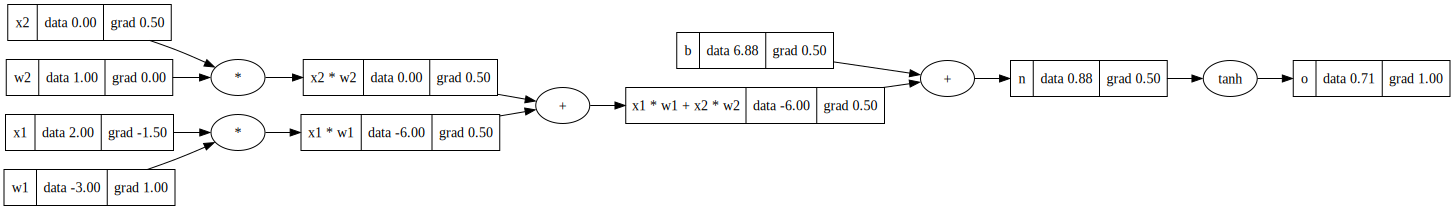

In [8]:
draw_graph(o)

In [9]:
# Single optimisation step. Increasing o by moving in the direction of the gradient.
w1.data += 0.01 * w1.grad
w2.data += 0.01 * w2.grad
b.data += 0.01 * b.grad

# Forward pass
x1w1 = x1 * w1
x2w2 = x2 * w2
x1w1x2w2 = x1 * w1 + x2 * w2
n = x1w1x2w2 + b
o = n.tanh()

print(o.data)

0.7193871348523168


### Semi-Automatic Backpropagation on a Neuron

In [10]:
# Inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, label='b')

# n = x1 * w1 + x2 * w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1 * w1'
x2w2 = x2 * w2
x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1 * w1 + x2 * w2'
n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh()
o.label = 'o'


In [11]:
# Backpropagation
o.grad = 1
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

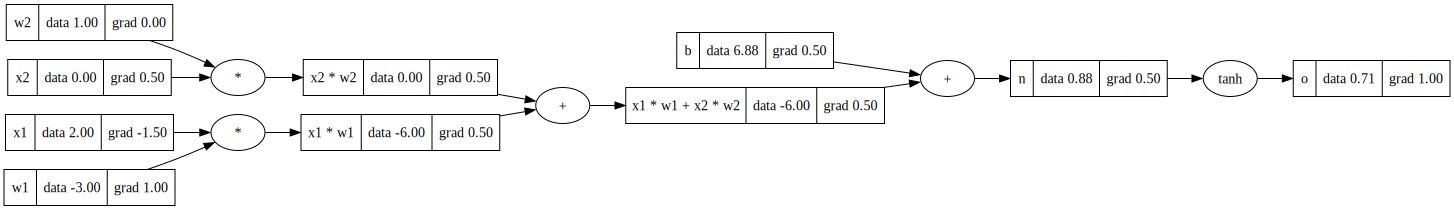

In [12]:
draw_graph(o)

### Automatic Backpropagation on a Neuron

In [13]:
# Inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, label='b')

# n = x1 * w1 + x2 * w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1 * w1'
x2w2 = x2 * w2
x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1 * w1 + x2 * w2'
n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh()
o.label = 'o'

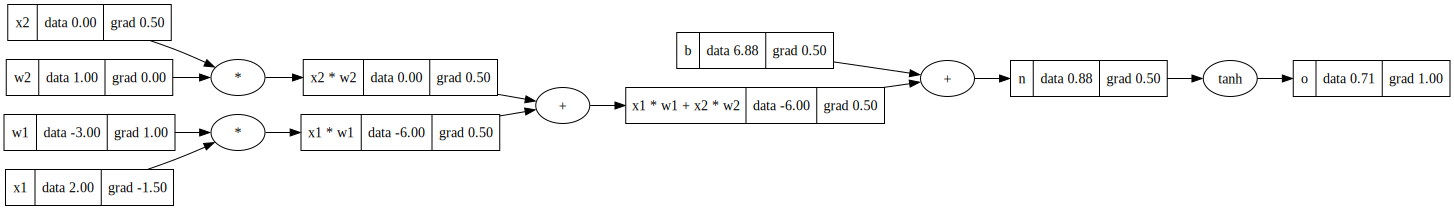

In [14]:
# Backpropagation
o.backward()
draw_graph(o)